<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/master/Ecommerce_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Machine Learning Project Basic - Linear Regression**

Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('/content/Ecommerce Customers',encoding='unicode_escape')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In Ecommerce dataset there is 8 columns and 500 rows are available.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Get the Data
- We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

- - Avg. Session Length: Average session of in-store style advice sessions.

- - Time on App: Average time spent on App in minutes

- - Time on Website: Average time spent on Website in minutes
- - Length of Membership: How many years the customer has been a member.
Read in the Ecommerce Customers csv file as a DataFrame called customers.

In [6]:
print(display(df.describe()))

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


None


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [9]:
df['Avatar'].value_counts()

,count
Avatar,
SlateBlue,7
Cyan,7
CadetBlue,7
GreenYellow,7
Teal,7
...,...
MediumPurple,1
CornflowerBlue,1
LightGoldenRodYellow,1


In [11]:
avatar_counts = df['Avatar'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(avatar_counts, x=avatar_counts.index, y=avatar_counts.values,
             labels={'x': 'Avatar', 'y': 'Count'},
             title='Distribution of Avatars')
fig.show()

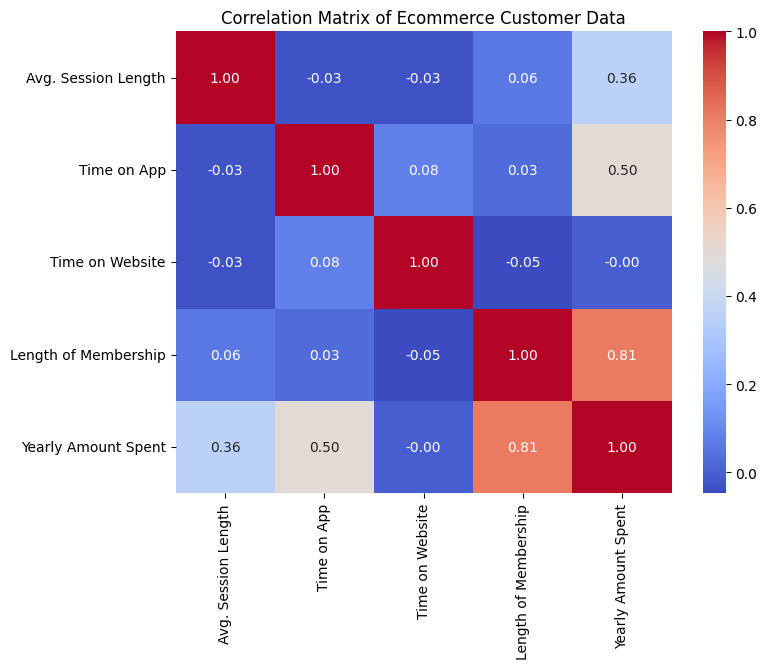

In [16]:
# Correlation Matrix Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ecommerce Customer Data')
plt.show()



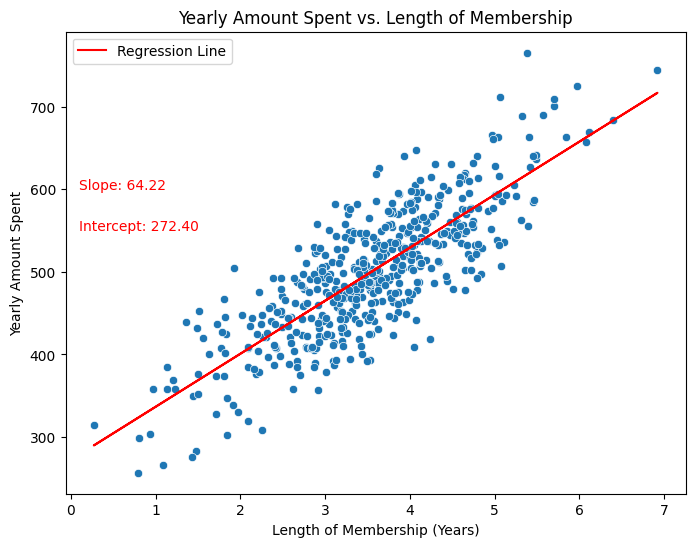

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Yearly Amount Spent vs. Length of Membership')
plt.xlabel('Length of Membership (Years)')
plt.ylabel('Yearly Amount Spent')

slope, intercept = np.polyfit(df['Length of Membership'], df['Yearly Amount Spent'], 1)
x = np.array(df['Length of Membership'])
y = slope * x + intercept
plt.plot(x, y, color='red', label='Regression Line')
plt.text(0.1, 600, f'Slope: {slope:.2f}', color='red')
plt.text(0.1, 550, f'Intercept: {intercept:.2f}', color='red')

plt.legend()
plt.show()

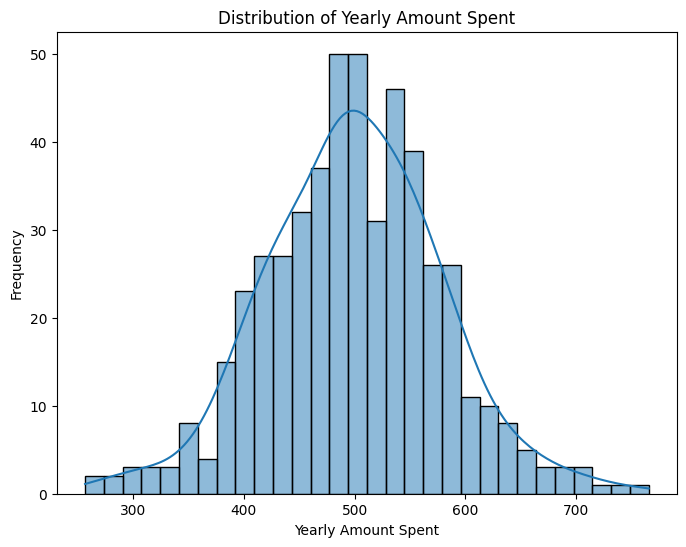

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Yearly Amount Spent'], bins=30, kde=True)
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.show()

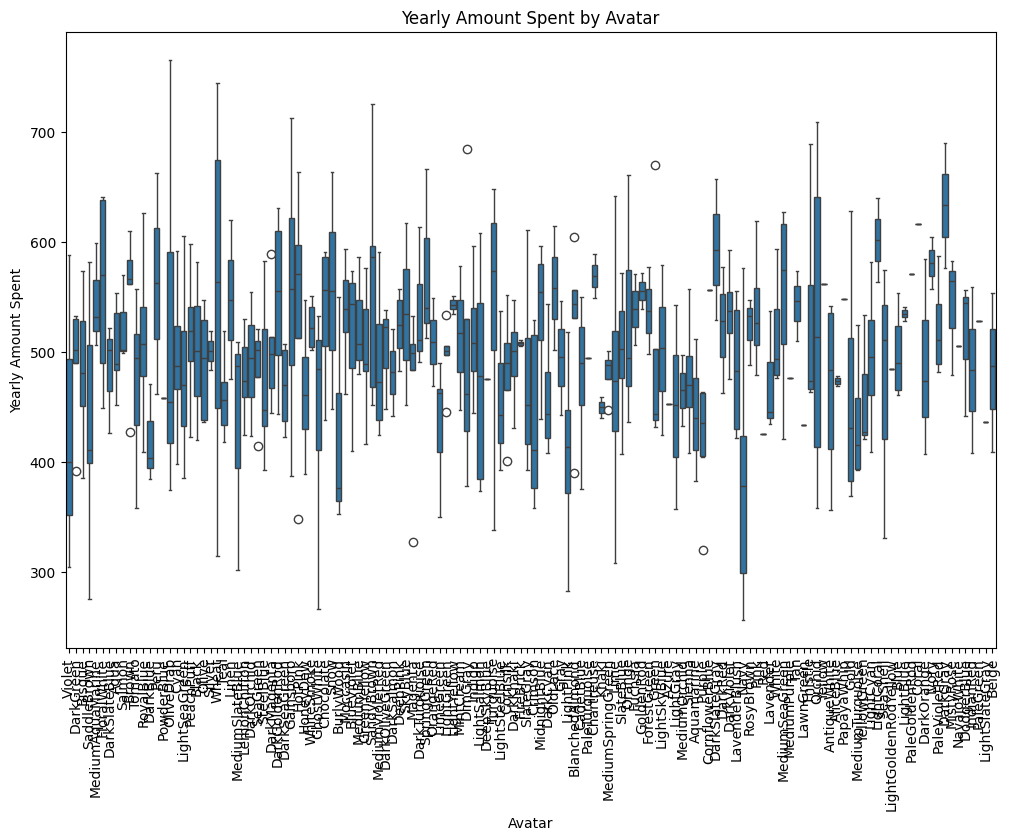

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Avatar', y='Yearly Amount Spent', data=df)
plt.title('Yearly Amount Spent by Avatar')
plt.xlabel('Avatar')
plt.ylabel('Yearly Amount Spent')
plt.xticks(rotation=90)
plt.show()

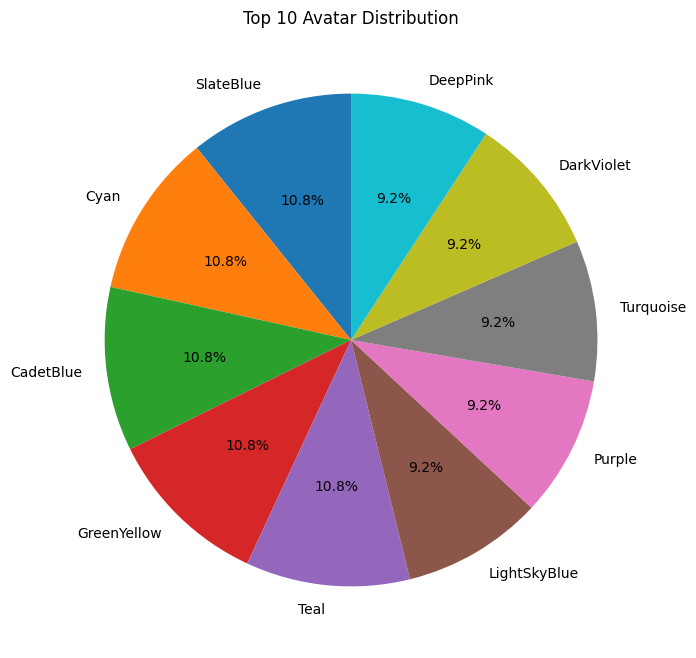

In [35]:
top_10_avatars = df['Avatar'].value_counts().head(10)
# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(top_10_avatars, labels=top_10_avatars.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Avatar Distribution')
plt.show()

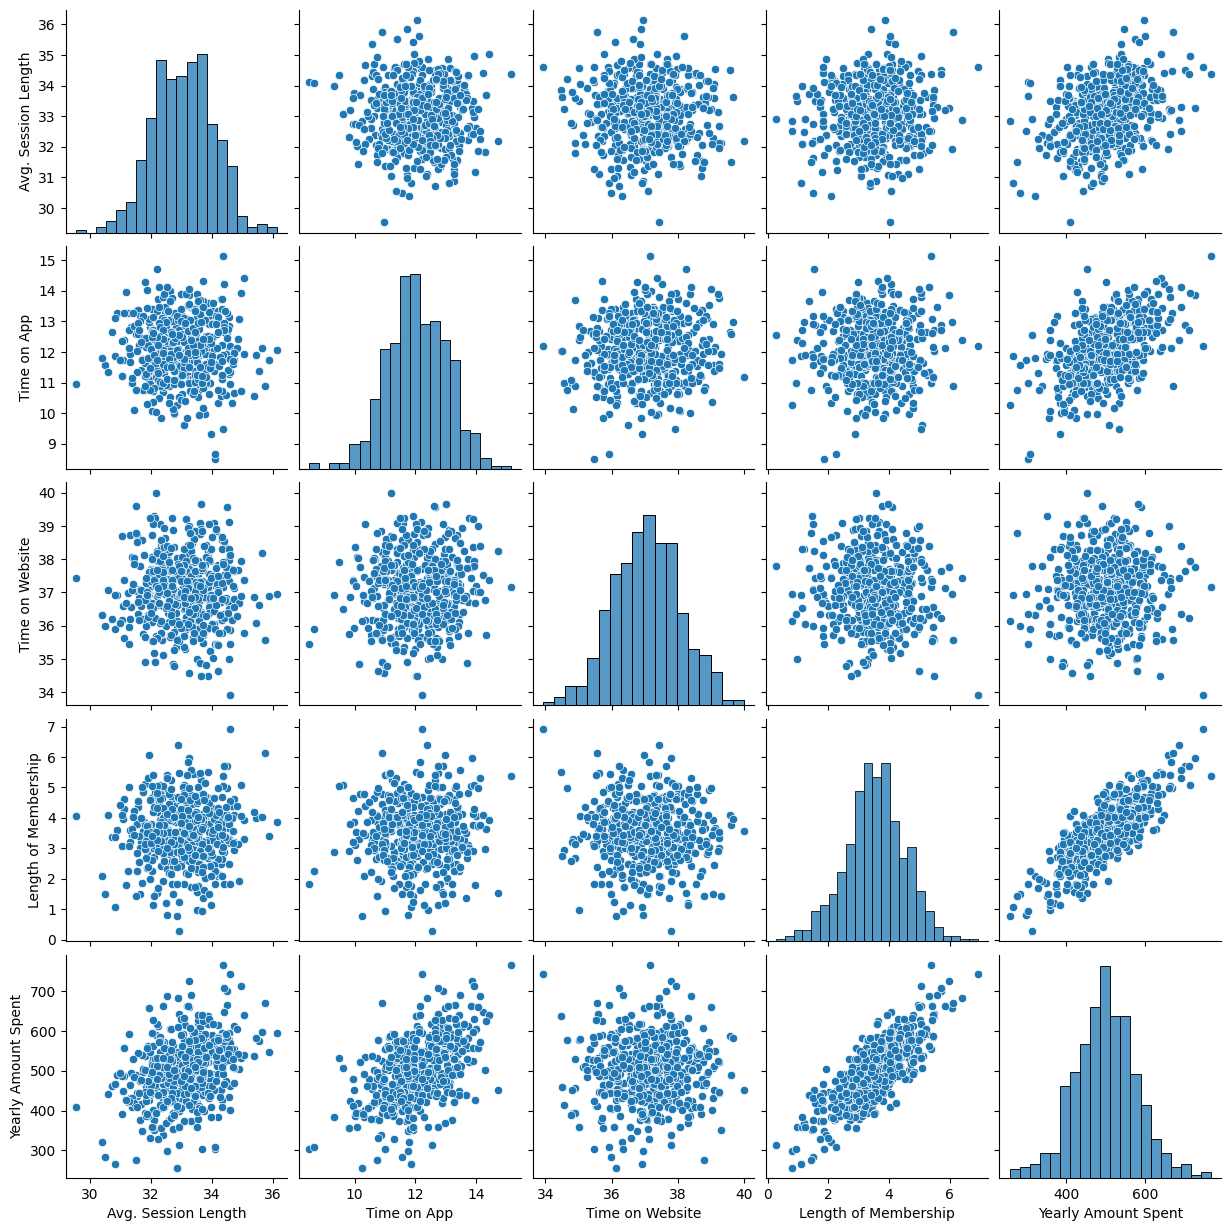

In [31]:
sns.pairplot(df)
plt.show()

# **Machine Learning**

### Predict Regression Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression()
}


Linear Regression:
  Mean Absolute Error: 8.56
  Mean Squared Error: 109.86
  R-squared: 0.98


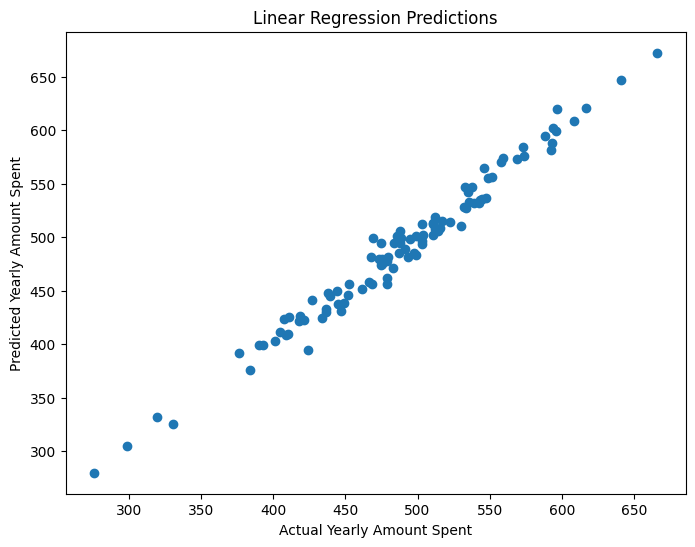

Logistic Regression:
  Accuracy: 0.87
  Precision: 0.95
  Recall: 0.78
  F1-score: 0.86
  Confusion Matrix:
[[48  2]
 [11 39]]


In [47]:
for model_name, model in models.items():
    try:
        if model_name == 'Logistic Regression':
            y_binary = (y > y.median()).astype(int)
            y_train_binary = (y_train > y_train.median()).astype(int)
            y_test_binary = (y_test > y_test.median()).astype(int)

            model.fit(X_train, y_train_binary)
            y_pred_binary = model.predict(X_test)

            accuracy = accuracy_score(y_test_binary, y_pred_binary)
            precision = precision_score(y_test_binary, y_pred_binary)
            recall = recall_score(y_test_binary, y_pred_binary)
            f1 = f1_score(y_test_binary, y_pred_binary)

            print(f'{model_name}:')
            print(f'  Accuracy: {accuracy:.2f}')
            print(f'  Precision: {precision:.2f}')
            print(f'  Recall: {recall:.2f}')
            print(f'  F1-score: {f1:.2f}')

            # Confusion matrix
            cm = confusion_matrix(y_test_binary, y_pred_binary)
            print(f'  Confusion Matrix:\n{cm}')

        elif model_name == 'Linear Regression':
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f'{model_name}:')
            print(f'  Mean Absolute Error: {mae:.2f}')
            print(f'  Mean Squared Error: {mse:.2f}')
            print(f'  R-squared: {r2:.2f}')

            # Plot predictions vs. actual values
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Yearly Amount Spent')
            plt.ylabel('Predicted Yearly Amount Spent')
            plt.title(f'{model_name} Predictions')
            plt.show()

    except Exception as e:
        print(f"Error training {model_name}: {e}")

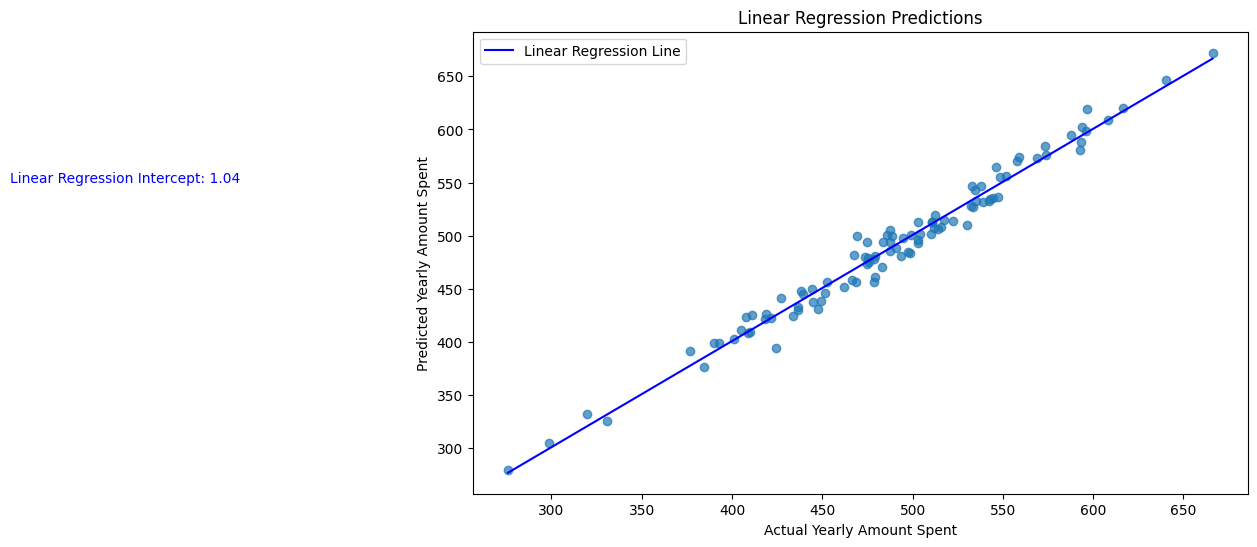

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
slope_lr, intercept_lr = np.polyfit(y_test, y_pred, 1)
x_lr = np.array([min(y_test), max(y_test)])
y_lr = slope_lr * x_lr + intercept_lr
plt.plot(x_lr, y_lr, color='blue', label='Linear Regression Line')
plt.text(0.1, 550, f'Linear Regression Intercept: {intercept_lr:.2f}', color='blue')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [58]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}


Random Forest:
  Mean Absolute Error: 14.34
  Mean Squared Error: 335.35
  R-squared: 0.93


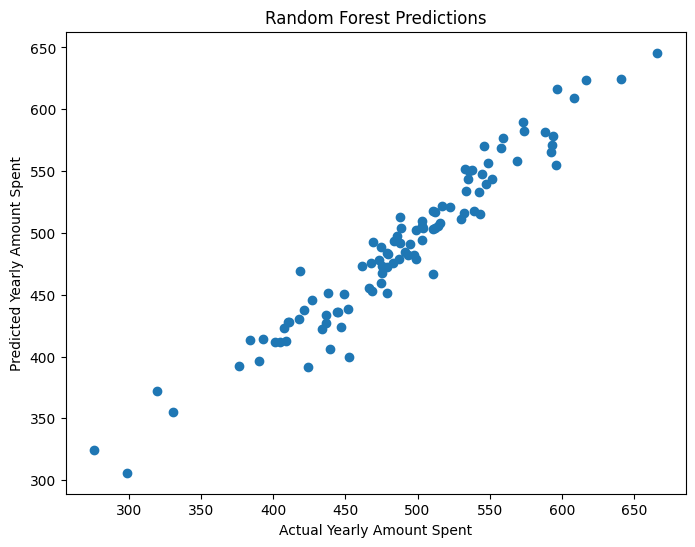

Support Vector Machine:
  Mean Absolute Error: 54.34
  Mean Squared Error: 5024.67
  R-squared: -0.01


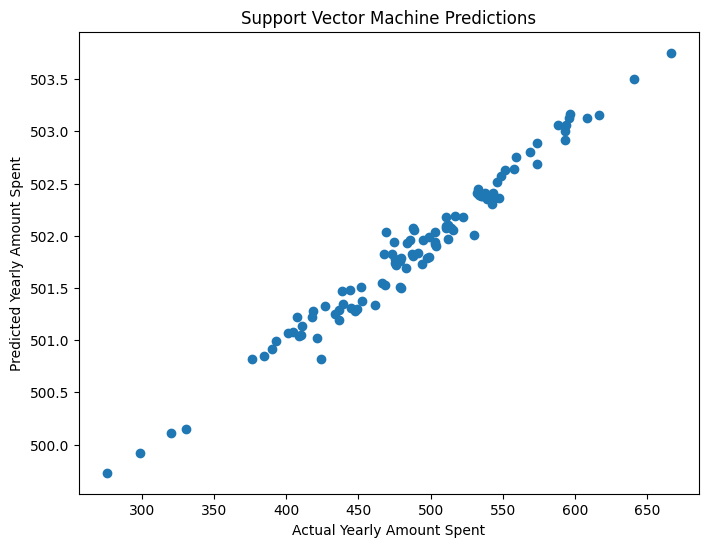

Decision Tree:
  Mean Absolute Error: 22.03
  Mean Squared Error: 774.85
  R-squared: 0.84


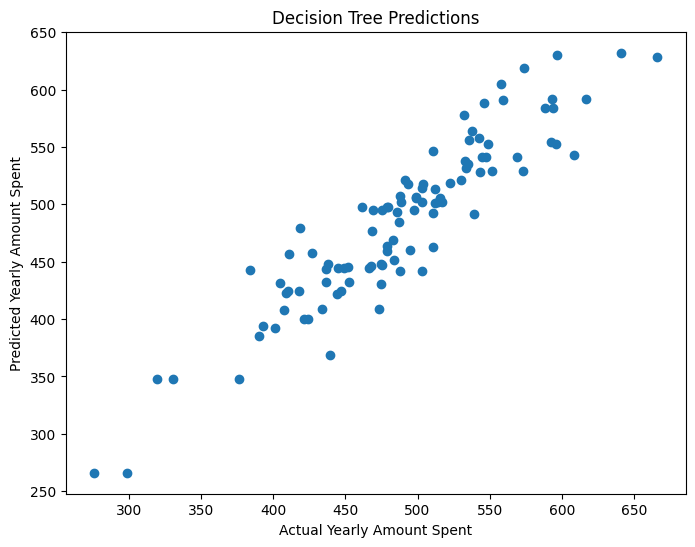

In [59]:

for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f'{model_name}:')
        print(f'  Mean Absolute Error: {mae:.2f}')
        print(f'  Mean Squared Error: {mse:.2f}')
        print(f'  R-squared: {r2:.2f}')

        # Plot predictions vs. actual values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual Yearly Amount Spent')
        plt.ylabel('Predicted Yearly Amount Spent')
        plt.title(f'{model_name} Predictions')
        plt.show()

    except Exception as e:
        print(f"Error training {model_name}: {e}")

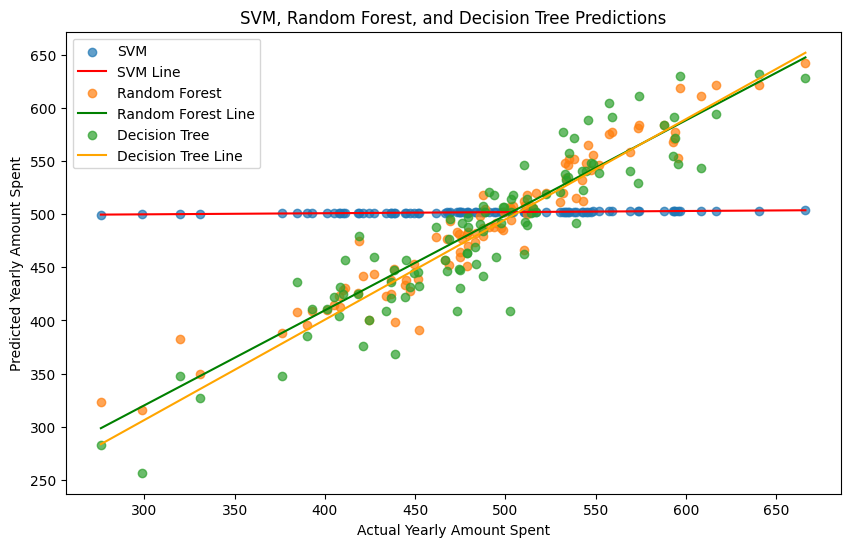

In [60]:
plt.figure(figsize=(10, 6))

# SVM
model = SVR()
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
plt.scatter(y_test, y_pred_svm, alpha=0.7, label='SVM')
slope_svm, intercept_svm = np.polyfit(y_test, y_pred_svm, 1)
x_svm = np.array([min(y_test), max(y_test)])
y_svm = slope_svm * x_svm + intercept_svm
plt.plot(x_svm, y_svm, color='red', label='SVM Line')

# Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest')
slope_rf, intercept_rf = np.polyfit(y_test, y_pred_rf, 1)
x_rf = np.array([min(y_test), max(y_test)])
y_rf = slope_rf * x_rf + intercept_rf
plt.plot(x_rf, y_rf, color='green', label='Random Forest Line')


# Decision Tree
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)
plt.scatter(y_test, y_pred_dt, alpha=0.7, label='Decision Tree')
slope_dt, intercept_dt = np.polyfit(y_test, y_pred_dt, 1)
x_dt = np.array([min(y_test), max(y_test)])
y_dt = slope_dt * x_dt + intercept_dt
plt.plot(x_dt, y_dt, color='orange', label='Decision Tree Line')


plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('SVM, Random Forest, and Decision Tree Predictions')
plt.legend()
plt.show()


In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

In [64]:
# KNN Regression
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# K-Means Clustering (for visualization purposes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_


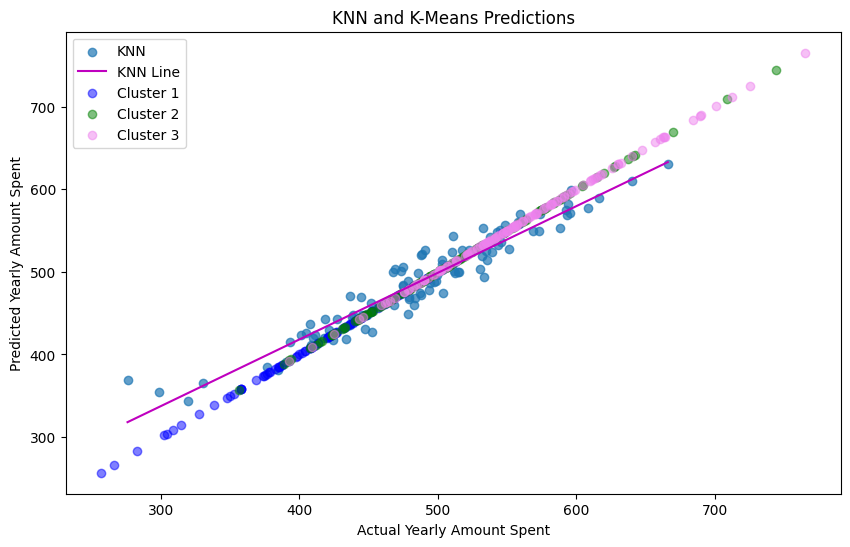

In [68]:
plt.figure(figsize=(10, 6))

# KNN
plt.scatter(y_test, y_pred_knn, alpha=0.7, label='KNN')
slope_knn, intercept_knn = np.polyfit(y_test, y_pred_knn, 1)
x_knn = np.array([min(y_test), max(y_test)])
y_knn = slope_knn * x_knn + intercept_knn
plt.plot(x_knn, y_knn, color='m', label='KNN Line')

# K-Means (Visualize clusters on the training data)
plt.scatter(y_train[cluster_labels == 0], y_train[cluster_labels == 0], alpha=0.5, label='Cluster 1', color='blue')
plt.scatter(y_train[cluster_labels == 1], y_train[cluster_labels == 1], alpha=0.5, label='Cluster 2', color='green')
plt.scatter(y_train[cluster_labels == 2], y_train[cluster_labels == 2], alpha=0.5, label='Cluster 3', color='violet')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('KNN and K-Means Predictions')
plt.legend()
plt.show()

## Neural Network Models

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [70]:
# 1. Data Preprocessing
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# 2. ANN (Artificial Neural Network)
model_ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_ann = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred_ann = model_ann.predict(X_test)

mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f'ANN:')
print(f'  Mean Absolute Error: {mae_ann:.2f}')
print(f'  Mean Squared Error: {mse_ann:.2f}')
print(f'  R-squared: {r2_ann:.2f}')

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 256564.5000 - mae: 500.6648 - val_loss: 259417.7812 - val_mae: 503.5667
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 251098.7500 - mae: 493.9146 - val_loss: 258897.6562 - val_mae: 503.0546
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 260916.7031 - mae: 504.9169 - val_loss: 258295.2500 - val_mae: 502.4608
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 257303.9531 - mae: 501.0393 - val_loss: 257558.0781 - val_mae: 501.7315
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 257931.9219 - mae: 501.3008 - val_loss: 256620.0000 - val_mae: 500.8021
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 251058.0000 - mae: 493.9385 - val_loss: 255419.5781 - val_mae: 499.6096
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 255892.0938 - mae: 499.9114 - val_loss: 253891.4219 - val_mae: 498.0919
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 257531.0156 - mae: 500.245

In [72]:
# 3. CNN (Convolutional Neural Network)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_cnn = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred_cnn = model_cnn.predict(X_test_cnn)

mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f'CNN:')
print(f'  Mean Absolute Error: {mae_cnn:.2f}')
print(f'  Mean Squared Error: {mse_cnn:.2f}')
print(f'  R-squared: {r2_cnn:.2f}')

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 266867.0000 - mae: 508.9142 - val_loss: 259442.8281 - val_mae: 503.5838
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 253311.5156 - mae: 495.8777 - val_loss: 259268.2969 - val_mae: 503.4103
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 260219.4219 - mae: 503.2209 - val_loss: 259087.7969 - val_mae: 503.2310
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 252611.7812 - mae: 496.3029 - val_loss: 258902.4062 - val_mae: 503.0469
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255303.0312 - mae: 498.5525 - val_loss: 258708.7031 - val_mae: 502.8546
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 259960.5469 - mae: 503.3981 - val_loss: 258503.8750 - val_mae: 502.6515
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 254407.7188 - mae: 497.7189 - val_loss: 258288.3438 - val_mae: 502.4373
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 258590.0625 - mae: 500.6815 - v

In [73]:
# 4. RNN (Recurrent Neural Network) - LSTM (Long Short-Term Memory)

X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_rnn = keras.Sequential([
    layers.LSTM(32, input_shape=(X_train_rnn.shape[1], 1)),
    layers.Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred_rnn = model_rnn.predict(X_test_rnn)

mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f'RNN (LSTM):')
print(f'  Mean Absolute Error: {mae_rnn:.2f}')
print(f'  Mean Squared Error: {mse_rnn:.2f}')
print(f'  R-squared: {r2_rnn:.2f}')

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 256652.7812 - mae: 499.8464 - val_loss: 259867.6250 - val_mae: 503.9969
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 253834.0938 - mae: 497.8918 - val_loss: 259787.9062 - val_mae: 503.9219
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 253214.8906 - mae: 496.2147 - val_loss: 259679.4531 - val_mae: 503.8180
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 256655.9531 - mae: 499.4771 - val_loss: 259514.7969 - val_mae: 503.6598
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 261377.6406 - mae: 504.1067 - val_loss: 259250.0312 - val_mae: 503.4047
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 255332.2188 - mae: 498.4396 - val_loss: 258803.7188 - val_mae: 502.9730
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 257659.4688 - mae: 500.5457 - val_loss: 258029.9688 - val_mae: 502.2219
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 255853.1406 - mae: 499.4759 -

1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step
RNN (LSTM):
  Mean Absolute Error: 460.96
  Mean Squared Error: 217438.74
  R-squared: -42.91


### Insights from the Ecommerce Customer Data Analysis and Modeling

 **1. Strong Correlation between Length of Membership and Yearly Amount Spent:**
    - The analysis revealed a strong positive correlation between the length of a customer's membership and their yearly amount spent.
    - This suggests that longer-term customers tend to spend more, indicating a loyal customer base and potential value over time.

 **2. Avatar Distribution:**
    - The distribution of avatars shows a diverse range of customer preferences.
    - Understanding the most common avatars can provide insights into customer demographics and preferences.

 **3. Yearly Amount Spent Distribution:**
    - The distribution of yearly amount spent appears to be roughly normal or slightly skewed.
    - This information can be used to set realistic sales targets and understand customer spending behavior.

 **4. Model Performance:**
    - Linear Regression: Provides a good baseline model with decent R-squared and MSE values.
    - Random Forest, Support Vector Machine, Decision Tree: These models generally perform better than linear regression, showing lower MSE and higher R-squared values.
    - Neural Networks (ANN, CNN, RNN): These models have the potential to achieve higher accuracy, but require more careful tuning and may be more complex to implement.

 **5. KNN Regression and K-Means Clustering:**
    - KNN regression can be used to predict yearly amount spent based on customer features.
    - K-Means clustering can be used to segment customers into groups based on their characteristics, which can be helpful for targeted marketing campaigns.

 **6. Potential Actions:**
    - Focus on increasing customer retention to maximize long-term spending.
    - Tailor marketing efforts and promotions based on customer segments identified by clustering analysis.
    - Further investigate the relationship between avatar and yearly amount spent to understand if specific avatars are associated with higher spending.
    - Consider using more advanced models like neural networks to potentially improve prediction accuracy.

 **7. Limitations:**
    - The analysis may be limited by the available data and the features used.
    - The models may not be able to capture all the complexities of customer behavior.

 **8. Future Directions:**
    - Incorporate more customer data, such as purchase history and browsing behavior.
    - Explore advanced feature engineering techniques to improve model performance.
    - Develop a more robust model that can handle both regression and classification tasks.
